In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 1000
Nx = 50

a = 0.2
b = 0.3
e = 0.03

x = np.linspace(0,1,Nx)
t = np.linspace(0,10,Nt)

deltax = x[1] - x[0]
deltat = t[1] - t[0]

D = 0.01
lambda_ = (D*deltat)/deltax**2


print(lambda_)

0.2403403403403404


In [3]:
def h1():
    return np.random.uniform(0,0.3) 

In [4]:
def initT():
    u = np.zeros((Nt,Nx))
    u[0,:] = h1()
    u[:,0] = 0.1
    u[:,-1] = 0.2
    return u

In [5]:
u = initT()
w = np.zeros((Nt,Nx))

In [6]:
u[0]

array([0.1       , 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.15952027,
       0.15952027, 0.15952027, 0.15952027, 0.15952027, 0.2       ])

In [7]:
def GetSolution(u,w):
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            w[l,i] = w[l-1,i]+deltat*e*(u[l-1,i]-b*w[l-1,i])
            u[l,i] = u[l-1,i] + lambda_*( u[l-1,i+1] - 2*u[l-1,i] + u[l-1,i-1] )-deltat*( u[l-1,i]*( u[l-1,i]-a)*(1- u[l-1,i]))+deltat* w[l-1,i]

In [8]:
GetSolution(u,w)

100%|██████████████████████████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 4141.18it/s]


<IPython.core.display.Javascript object>


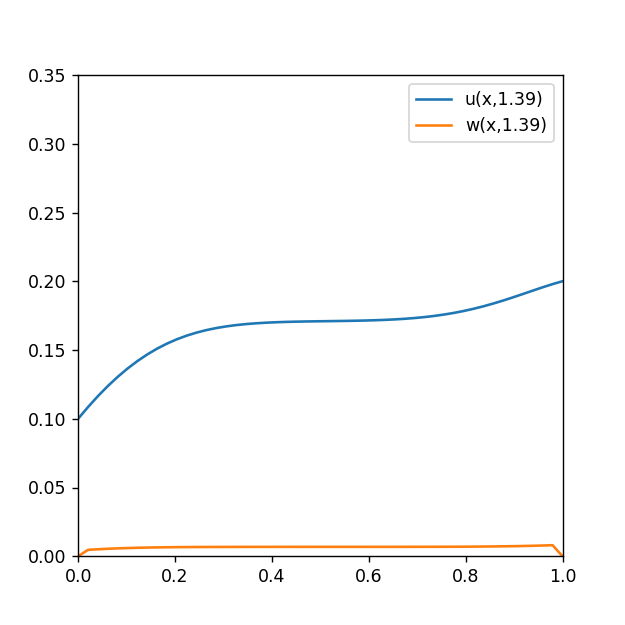

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)



def init():
    
    ax.clear()
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.35)
    
def Update(i):
    
    init()
    ax.plot(x,u[i,:],'-', label=r'u(x,%.2f)' %(t[i]))
    ax.plot(x,w[i,:],'-', label=r'w(x,%.2f)' %(t[i]))
    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [10]:
for i in range(len(t)):
    if np.max(u[i])>0.3:
        tiempo = t[i]
        for j in range(len(x)):
            if u[i][j]>0.3:
                pos = x[j]
                break
        break
print('Cuando transcurren '+str(tiempo)+' segundos, en la posición '+str(pos)+' hay activación neuronal')

Cuando transcurren 8.088088088088089 segundos, en la posición 0.6122448979591836 hay activación neuronal
